In [1]:
%matplotlib inline
import sys
BIN = '../'
sys.path.append(BIN)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
#import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import my_matplotlib_style as ms

from fastai import data_block, basic_train, basic_data
import fastai

In [2]:
from my_nn_modules import AE_big

In [3]:
torch.cuda.is_available()

False

In [4]:
#fastai.torch_core.defaults.device = 'cuda'

In [5]:
# Load data
train = pd.read_pickle(BIN + 'processed_data/train.pkl')
test = pd.read_pickle(BIN + 'processed_data/test.pkl')
n_features = len(train.loc[0])

train.head(10)

pT       eta       phi            E
1367643  300.752869  0.118391 -1.460827   303.719818
1739612   79.819145  4.535507 -1.185196  3722.832764
546066   220.472305  1.314261 -0.943992   440.195190
213212    74.533775  0.010658 -0.424795    74.770332
150544   220.668121  2.432910 -2.308348  1266.681030
574837   159.841782  0.731125 -1.150598   207.133514
1171687  306.125305  0.702473  0.437615   385.713013
1608254  189.011673 -1.387443  0.490634   403.126709
1618830  194.996719 -1.022815 -1.560437   306.534515
637947   186.887146 -0.621282 -0.465523   226.002701

In [6]:
# Normalize
train_mean = train.mean()
train_std = train.std()

train = (train - train_mean) / train_std
# Is this the right way to normalize? (only using train mean and std to normalize both train and test)
test = (test - train_mean) / train_std

train_x = train
test_x = test
train_y = train_x  # y = x since we are building and AE
test_y = test_x

train_ds = TensorDataset(torch.tensor(train_x.values), torch.tensor(train_y.values))
valid_ds = TensorDataset(torch.tensor(test_x.values), torch.tensor(test_y.values))

In [7]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [8]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs=1024)

In [9]:
db = basic_data.DataBunch(train_dl, valid_dl)

In [10]:
db

<<<<<<< local <modified: text/plain>


DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7fab866fa7d0>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7fab86713ed0>;

Test: None

DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x10b4ae6a0>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x12c497390>;

Test: None

>>>>>>> remote <modified: text/plain>


In [11]:
class AE_big(nn.Module):
    def __init__(self, n_features=4, dropout=0.5):
        super(AE_big, self).__init__()
        if type(dropout) is list:
            p1 = dropout[0]
            p2 = dropout[1]
            p3 = dropout[2]
            p4 = dropout[3]
            p5 = dropout[4]
            p6 = dropout[5]
            p7 = dropout[6]
        else:
            p1 = dropout
            p2 = dropout
            p3 = dropout
            p4 = dropout
            p5 = dropout
            p6 = dropout
            p7 = dropout
        self.en1 = nn.Linear(n_features, 200)
        self.bn1 = nn.BatchNorm1d(200)
        self.en2 = nn.Linear(200, 100)
        self.bn2 = nn.BatchNorm1d(100)
        self.en3 = nn.Linear(100, 50)
        self.bn3 = nn.BatchNorm1d(50)
        self.en4 = nn.Linear(50, 3)
        self.bn5 = nn.BatchNorm1d(3)
        self.de1 = nn.Linear(3, 50)
        self.bn6 = nn.BatchNorm1d(50)
        self.de2 = nn.Linear(50, 100)
        self.bn7 = nn.BatchNorm1d(100)
        self.de3 = nn.Linear(100, 200)
        self.bn8 = nn.BatchNorm1d(200)
        self.de4 = nn.Linear(200, n_features)
        self.tanh = nn.Tanh()
        self.drop1 = nn.Dropout(p1)
        self.drop2 = nn.Dropout(p2)
        self.drop3 = nn.Dropout(p3)
        self.drop4 = nn.Dropout(p4)
        self.drop5 = nn.Dropout(p5)
        self.drop6 = nn.Dropout(p6)
        self.drop7 = nn.Dropout(p7)

    def encode(self, x):
        h1 = self.drop1(self.bn1(self.tanh(self.en1(x))))
        h2 = self.drop2(self.bn2(self.tanh(self.en2(h1))))
        h3 = self.drop3(self.bn3(self.tanh(self.en3(h2))))
        z = self.en4(h3)
        return z

    def decode(self, x):
        h5 = self.drop5(self.bn6(self.tanh(self.de1(self.drop4(self.bn5(self.tanh(x)))))))
        h6 = self.drop6(self.bn7(self.tanh(self.de2(h5))))
        h7 = self.drop7(self.bn8(self.tanh(self.de3(h6))))
        return self.de4(h7)

    def forward(self, x):
        z = self.encode(x)
        return self.decode(z)

    def describe(self):
        pass

In [ ]:
<<<<<<< local
model = AE_big(dropout=[0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.01])
model = AE_big(dropout=0)
=======
model = AE_big(dropout=[0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.05])
model.train()
>>>>>>> remote

AE_big(
  (en1): Linear(in_features=4, out_features=200, bias=True)
  (bn1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (en2): Linear(in_features=200, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (en3): Linear(in_features=100, out_features=50, bias=True)
  (bn3): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (en4): Linear(in_features=50, out_features=3, bias=True)
  (bn5): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (de1): Linear(in_features=3, out_features=50, bias=True)
  (bn6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (de2): Linear(in_features=50, out_features=100, bias=True)
  (bn7): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (de3): Linear(in_features=100, out_features=200, bias=True)
  (bn8): BatchNorm1d(200, eps=1e

In [ ]:
for pars in model.parameters():
    if len(pars.shape) > 1:
        nn.init.xavier_normal_(pars)

In [ ]:
#def my_loss_func(input, target):
#    np.power(target - input, 2).mean()
loss_func = nn.MSELoss()
#loss_func = my_loss_func
#loss_func = model.ae_loss
#learn = basic_train.Learner(data=db, model=model, loss_func=loss_func)

In [ ]:
learn = basic_train.Learner(data=db, model=model, loss_func=loss_func)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


<<<<<<< local


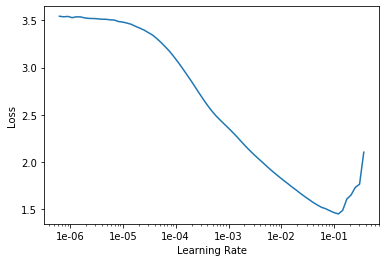

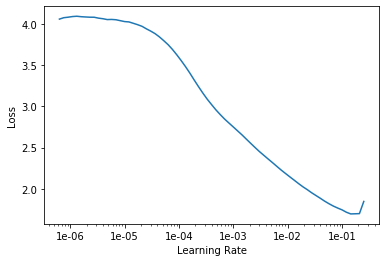

>>>>>>> remote


In [ ]:
from fastai import train as tr
tr.lr_find(learn)
learn.recorder.plot()

In [ ]:
lr = 1e-3
learn.fit_one_cycle(6, max_lr=lr, wd=0.01)

<<<<<<< local


>>>>>>> remote


<<<<<<< local <modified: text/html; unchanged: text/plain>


>>>>>>> remote <removed>


In [18]:
#learn.save('stage1')
#learn.load('stage1')

In [45]:
model.en4.weight.shape

torch.Size([3, 50])

([array([ 2.,  5.,  5., 11.,  9.,  7.,  7.,  1.,  2.,  1.]),
  array([ 0.,  2.,  7.,  9., 18.,  5.,  5.,  4.,  0.,  0.]),
  array([ 3.,  3.,  7.,  9., 15.,  7.,  3.,  1.,  2.,  0.])],
 array([-0.378834, -0.292554, -0.206274, -0.119995, -0.033715,  0.052565,  0.138844,  0.225124,  0.311404,  0.397683,
         0.483963], dtype=float32),
 <a list of 3 Lists of Patches objects>)

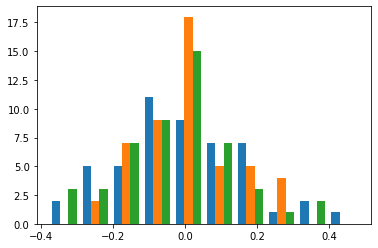

In [46]:
plt.hist(model.en4.weight)

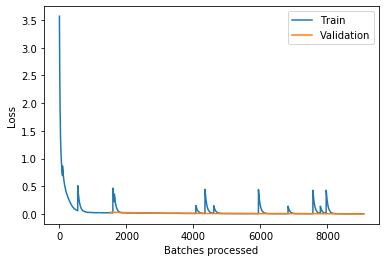

In [ ]:
learn.recorder.plot_losses()

<<<<<<< local <modified: text/plain>


>>>>>>> remote <removed>


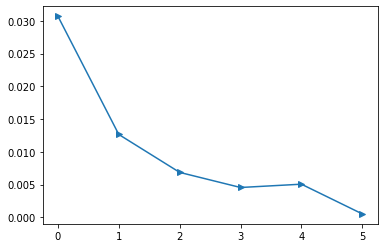

In [ ]:
plt.plot(learn.recorder.val_losses, marker='>')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


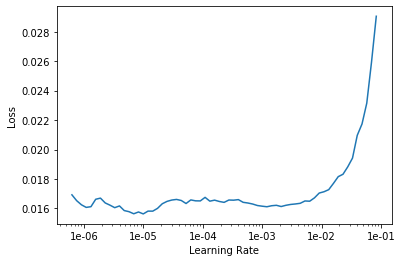

In [19]:
tr.lr_find(learn)
learn.recorder.plot()

In [24]:
lr = 1e-3
learn.fit_one_cycle(10, max_lr=lr, wd=0.01)

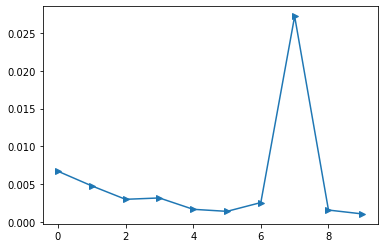

In [25]:
plt.plot(learn.recorder.val_losses, marker='>')

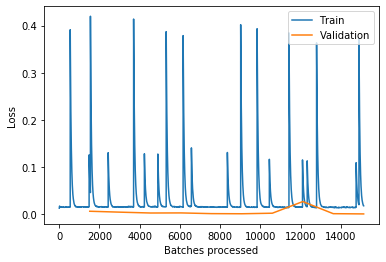

In [26]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


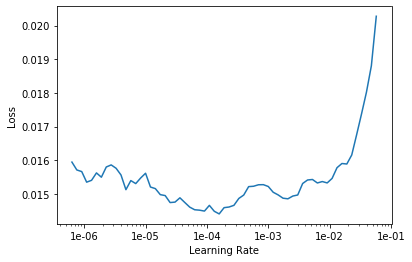

In [27]:
tr.lr_find(learn)
learn.recorder.plot()

In [62]:
lr = 1e-6
learn.fit(10, lr=lr, wd=0)

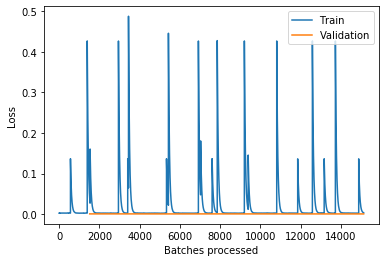

In [63]:
learn.recorder.plot_losses()

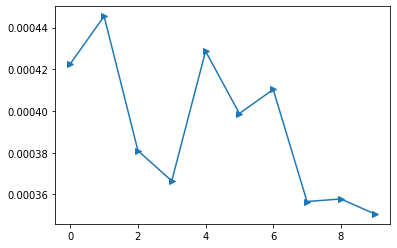

In [64]:
plt.plot(learn.recorder.val_losses, marker='>')

In [25]:
learn.data.train_ds.tensors[0][0]

tensor([ 0.6136,  0.0878, -0.8069, -0.5152])

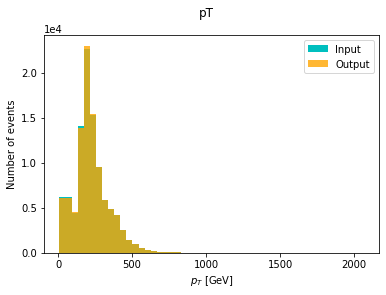

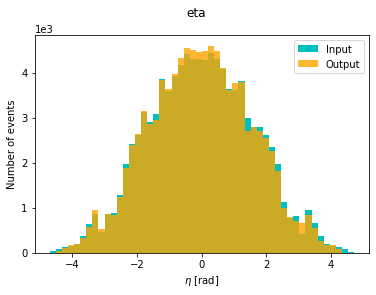

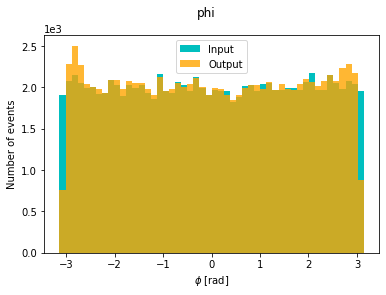

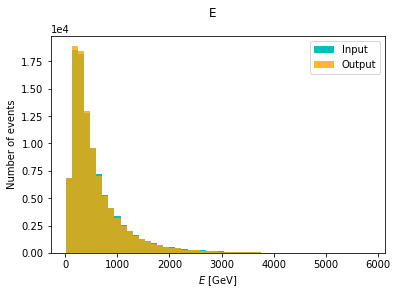

In [69]:
plt.close('all')
unit_list = ['[GeV]', '[rad]', '[rad]', '[GeV]']
variable_list = [r'$p_T$', r'$\eta$', r'$\phi$', r'$E$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

model.to('cpu')

# Histograms
idxs = (0, 100000)  # Choose events to compare
data = torch.tensor(test_x[idxs[0]:idxs[1]].values)
pred = model(data).detach().numpy()
pred = np.multiply(pred, train_std.values)
pred = np.add(pred, train_mean.values)
data = np.multiply(data, train_std.values)
data = np.add(data, train_mean.values)

alph = 0.8
n_bins = 50
for kk in np.arange(4):
    plt.figure(kk + 4)
    n_hist_data, bin_edges, _ = plt.hist(data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    n_hist_pred, _, _ = plt.hist(pred[:, kk], color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    plt.suptitle(train_x.columns[kk])
    plt.xlabel(variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('Number of events')
    ms.sciy()
    plt.legend()

## Check low pT reconstruction

In [70]:
# Load data
train = pd.read_pickle(BIN + 'processed_data/train.pkl')
test = pd.read_pickle(BIN + 'processed_data/test.pkl')

train = train[train['pT']<100]
test = test[test['pT']<100]
train.head()

pT       eta       phi            E
1739612  79.819145  4.535507 -1.185196  3722.832764
213212   74.533775  0.010658 -0.424795    74.770332
133632   73.335709 -0.998801  0.981093   113.546120
1321860  78.281624  1.674880 -2.164416   216.534836
1877459  57.215500 -3.269782 -0.657705   753.719360

In [71]:
# Normalize
train_mean = train.mean()
train_std = train.std()

train = (train - train_mean) / train_std
test = (test - train_mean) / train_std

train_x = train
test_x = test
train_y = train_x  # y = x since we are building and AE
test_y = test_x

train_ds = TensorDataset(torch.tensor(train_x.values), torch.tensor(train_y.values))
valid_ds = TensorDataset(torch.tensor(test_x.values), torch.tensor(test_y.values))

train_dl, valid_dl = get_data(train_ds, valid_ds, bs=512)

db = basic_data.DataBunch(train_dl, valid_dl)

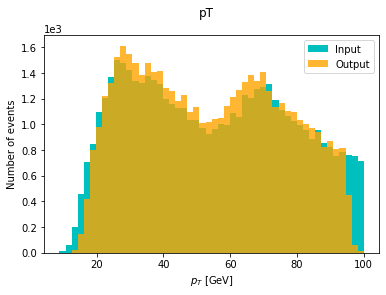

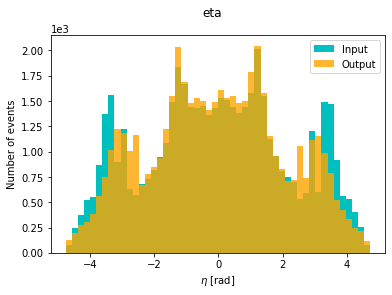

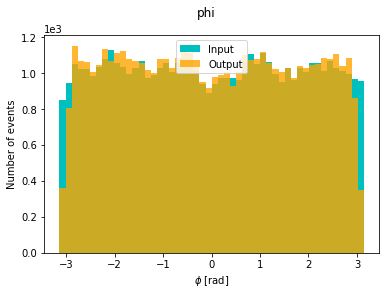

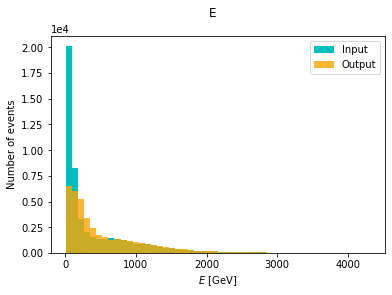

In [72]:
plt.close('all')
unit_list = ['[GeV]', '[rad]', '[rad]', '[GeV]']
variable_list = [r'$p_T$', r'$\eta$', r'$\phi$', r'$E$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

# Histograms
idxs = (0, 100000)  # Choose events to compare
data = torch.tensor(test_x[idxs[0]:idxs[1]].values)
pred = model(data).detach().numpy()
pred = np.multiply(pred, train_std.values)
pred = np.add(pred, train_mean.values)
data = np.multiply(data, train_std.values)
data = np.add(data, train_mean.values)

alph = 0.8
n_bins = 50
for kk in np.arange(4):
    plt.figure(kk + 4)
    n_hist_data, bin_edges, _ = plt.hist(data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    n_hist_pred, _, _ = plt.hist(pred[:, kk], color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    plt.suptitle(train_x.columns[kk])
    plt.xlabel(variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('Number of events')
    ms.sciy()
    plt.legend()